# Evaluate a model
## 16/11/22

Look at the results from running the `resnet18_1668093631_model_conv` model on data collected during the up/down experiments in July 2021.

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
from utils.plotting_tools import make_confmat
from sklearn.metrics import accuracy_score

`make_confmat` expects the input data to be lists of the true labels to compare with the output labels from the model. To create these lists, we'll need to pair the file names with both the true labels and the output labels. 

In [2]:
path_to_true = r'D:\model_eval_101122\manual_ground_truth_131122\processed-2021-07-25-11-10-36.057611408-low_mag_cam\all_rois'
path_to_pred = r'D:\model_eval_101122\updown_auto_111122\outputs\resnet18_1668093631_model_conv_1668325172\processed-2021-07-25-11-10-36.057611408-low_mag_cam'
#path_to_true = r'D:\model_eval_101122\manual_ground_truth_131122\processed-2021-08-09-09-30-27.040390608-low_mag_cam\all_rois'
#path_to_pred = r'D:\model_eval_101122\updown_auto_111122\outputs\resnet18_1668093631_model_conv_1668325172\processed-2021-08-09-09-30-27.040390608-low_mag_cam'

dirs_true = glob.glob(os.path.join(path_to_true, '*'))  # get the directories for 
true_labs = {}
for dir_t in dirs_true:
    tmp = glob.glob(os.path.join(dir_t, '*.jpeg'))
    true_labs[os.path.basename(dir_t)] = [os.path.basename(line) for line in tmp]

dirs_pred = glob.glob(os.path.join(path_to_pred, '*.txt'))  # use the output text files to avoid having to read all the image data

pred_labs ={}
for dir_p in dirs_pred:
    with open(dir_p, 'r') as ff:
        tmp = list(ff)
        ff.close()
    tmp = [line.strip() for line in tmp]
    
    pred_labs[os.path.splitext(os.path.basename(dir_p))[0]] = tmp

Make a numeric key for the labels, from *0* to *N* where *N* is the number of categories. 

In [3]:
num_labs = {}
flag = 0
for kk in true_labs.keys():
    num_labs[kk] = flag
    flag += 1

Make a dataframe with the image-id as the index and columns for the true and predicted labels. Start with the true labels.

In [4]:
ptfs = []
labs = []
for kk in true_labs.keys():
    ptfs.extend(true_labs[kk])
    labs.extend([num_labs[kk]]*len(true_labs[kk]))

Actually create the dataframe and set the `image-id` to the index of the matrix.

In [5]:
true_pred = pd.DataFrame(zip(ptfs, labs, np.zeros((len(labs),), dtype=int)), columns=['img-id', 'true_label', 'predicted_label'])
true_pred.set_index('img-id', inplace=True)

Iterate over the predicted labels and add the column of numeric class names to the dataframe.

In [6]:
for kk in pred_labs.keys():
    tmp = pred_labs[kk]
    true_pred.loc[true_pred.index.isin(tmp), 'predicted_label'] = num_labs[kk]

Compute the accuracy using sklearn. The first argument is a list of true labels, the second argument is the list of predicted labels. 

In [7]:
acc = accuracy_score(true_pred['true_label'], true_pred['predicted_label'])

Plot the confusion matrix using the utility tool.

c:\Users\spc\software\eilat_spc_data_wrangling\utils\plotting_tools.py:23: RuntimeWarning: invalid value encountered in divide
  conf = conf / conf.sum(axis=1)[:, np.newaxis]


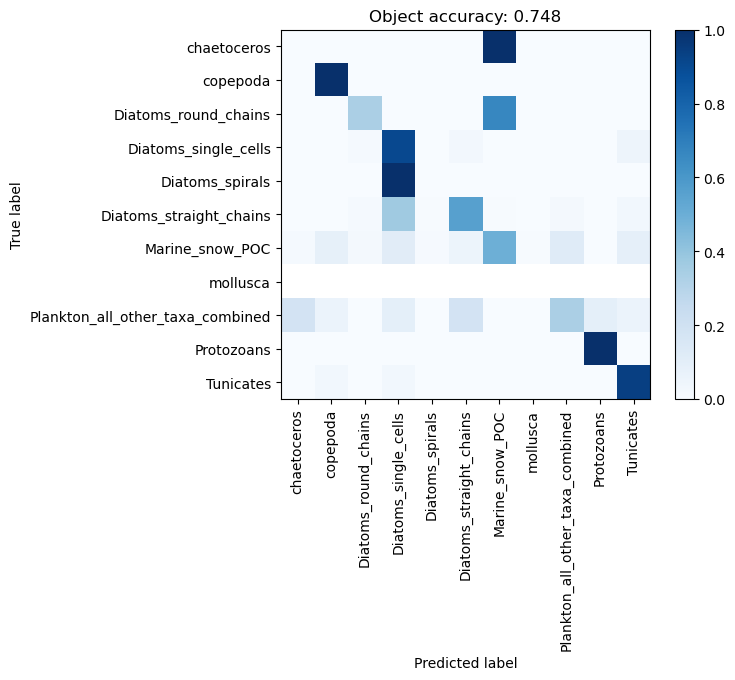

In [8]:
make_confmat(true_pred['true_label'], true_pred['predicted_label'], acc, labels=list(pred_labs.keys()))

Repeat the same process with the results from the resnet34 model.

In [9]:
path_to_true = r'D:\model_eval_101122\manual_ground_truth_131122\processed-2021-07-25-11-10-36.057611408-low_mag_cam\all_rois'
path_to_pred = r'D:\model_eval_101122\updown_auto_111122\outputs\resnet34_1668606123_model_conv_1668606550\processed-2021-07-25-11-10-36.057611408-low_mag_cam'
#path_to_true = r'D:\model_eval_101122\manual_ground_truth_131122\processed-2021-08-09-09-30-27.040390608-low_mag_cam\all_rois'
#path_to_pred = r'D:\model_eval_101122\updown_auto_111122\outputs\resnet34_1668606123_model_conv_1668606550\processed-2021-08-09-09-30-27.040390608-low_mag_cam'

dirs_true = glob.glob(os.path.join(path_to_true, '*'))  # get the directories for 
true_labs = {}
for dir_t in dirs_true:
    tmp = glob.glob(os.path.join(dir_t, '*.jpeg'))
    true_labs[os.path.basename(dir_t)] = [os.path.basename(line) for line in tmp]

dirs_pred = glob.glob(os.path.join(path_to_pred, '*.txt'))  # use the output text files to avoid having to read all the image data

pred_labs ={}
for dir_p in dirs_pred:
    with open(dir_p, 'r') as ff:
        tmp = list(ff)
        ff.close()
    tmp = [line.strip() for line in tmp]
    pred_labs[os.path.splitext(os.path.basename(dir_p))[0]] = tmp

Make a numeric key for the labels, from *0* to *N* where *N* is the number of categories. 

In [10]:
num_labs = {}
flag = 0
for kk in true_labs.keys():
    num_labs[kk] = flag
    flag += 1

Make a dataframe with the image-id as the index and columns for the true and predicted labels. Start with the true labels.

In [11]:
ptfs = []
labs = []
for kk in true_labs.keys():
    ptfs.extend(true_labs[kk])
    labs.extend([num_labs[kk]]*len(true_labs[kk]))

Actually create the dataframe and set the `image-id` to the index of the matrix.

In [12]:
true_pred = pd.DataFrame(zip(ptfs, labs, np.zeros((len(labs),), dtype=int)), columns=['img-id', 'true_label', 'predicted_label'])
true_pred.set_index('img-id', inplace=True)

Iterate over the predicted labels and add the column of numeric class names to the dataframe.

In [13]:
for kk in pred_labs.keys():
    tmp = pred_labs[kk]
    true_pred.loc[true_pred.index.isin(tmp), 'predicted_label'] = num_labs[kk]

Compute the accuracy using sklearn.

In [14]:
acc = accuracy_score(true_pred['true_label'], true_pred['predicted_label'])

Plot the confusion matrix using the utility tool.

c:\Users\spc\software\eilat_spc_data_wrangling\utils\plotting_tools.py:23: RuntimeWarning: invalid value encountered in divide
  conf = conf / conf.sum(axis=1)[:, np.newaxis]


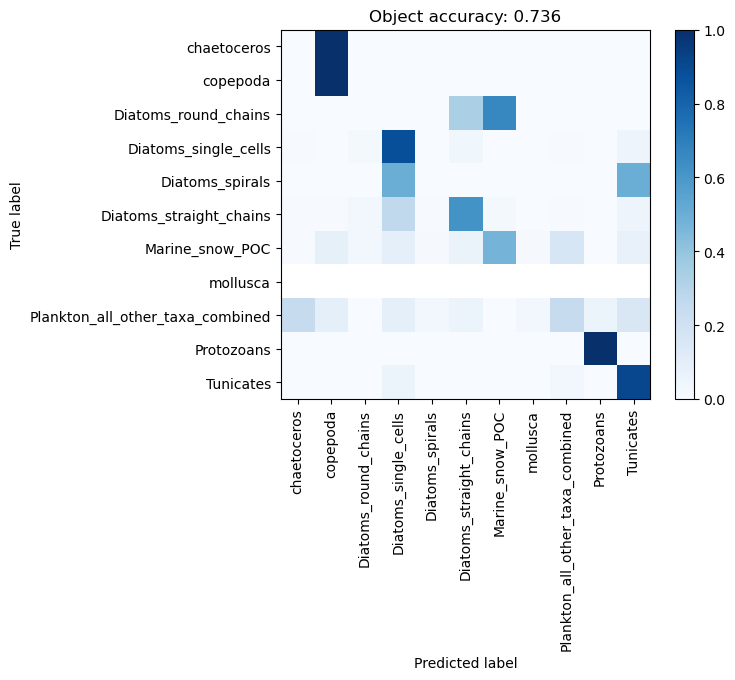

In [15]:
make_confmat(true_pred['true_label'], true_pred['predicted_label'], acc, labels=list(pred_labs.keys()))